#Importo librerie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import itertools

!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Definizione funzioni

In [2]:
# grafico matrice di confusione

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

#Importo dataset

In [3]:
# DL

drive.CreateFile({'id':'1kZP4KE8iynUEXP20KMD3NkLOOEMI7HOM'}).GetContentFile('results_DL_4.1_0.csv')
df_0 = pd.read_csv("results_DL_4.1_0.csv").drop('Unnamed: 0',axis=1)

drive.CreateFile({'id':'11lP5ySmnp_F3b1_L95Uapc542F6Zq1vj'}).GetContentFile('results_DL_4.1_1.csv')
df_1 = pd.read_csv("results_DL_4.1_1.csv").drop('Unnamed: 0',axis=1)

drive.CreateFile({'id':'1--51DFN61BMnd8LHhGFKiU5_G45dOs9x'}).GetContentFile('results_DL_4.1_2.csv')
df_2 = pd.read_csv("results_DL_4.1_2.csv").drop('Unnamed: 0',axis=1)

drive.CreateFile({'id':'1-3xYQe8vRJKn97DiDeX6diSE9nX0XUZG'}).GetContentFile('results_DL_4.1_3.csv')
df_3 = pd.read_csv("results_DL_4.1_3.csv").drop('Unnamed: 0',axis=1)

drive.CreateFile({'id':'1-FAXdbyZb1VROr6dKLRypUWMlBPpPH9i'}).GetContentFile('results_DL_4.1_all.csv')
df_4 = pd.read_csv("results_DL_4.1_all.csv").drop('Unnamed: 0',axis=1)

# ML

drive.CreateFile({'id':'18d3w2XA4JrD9Oxp5orjLaMi7FZnU28Ll'}).GetContentFile('results_ML_4.1_0.csv')
df_5 = pd.read_csv("results_ML_4.1_0.csv").drop('Unnamed: 0',axis=1)

drive.CreateFile({'id':'1PRYLOoZSNtFzv-PWLM8ugfLTT0He7Mj5'}).GetContentFile('results_ML_4.1_1.csv')
df_6 = pd.read_csv("results_ML_4.1_1.csv").drop('Unnamed: 0',axis=1)

drive.CreateFile({'id':'1-DSPmEG98SGvTbqematJDYPbCwzsQ83g'}).GetContentFile('results_ML_4.1_2.csv')
df_7 = pd.read_csv("results_ML_4.1_2.csv").drop('Unnamed: 0',axis=1)

drive.CreateFile({'id':'17jgjtkxzrPjyaG8TE6DnZbGJZ-OHvFym'}).GetContentFile('results_ML_4.1_3.csv')
df_8 = pd.read_csv("results_ML_4.1_3.csv").drop('Unnamed: 0',axis=1)

drive.CreateFile({'id':'1-IF49Oqoc1xcLkNByXnLk9sSl2F7alsI'}).GetContentFile('results_ML_4.1_all.csv')
df_9 = pd.read_csv("results_ML_4.1_all.csv").drop('Unnamed: 0',axis=1)

# DL regression

drive.CreateFile({'id':'1ENuTVjX7SiDgTmgxuY6xCzJoD7x1uFDA'}).GetContentFile('results_ML_4.1_0_regression.csv')
df_10 = pd.read_csv("results_ML_4.1_0_regression.csv").drop('Unnamed: 0',axis=1)

drive.CreateFile({'id':'1-8WnQ9-pBQh7Tv7ZT4hEaA_NSrEe3wms'}).GetContentFile('results_ML_4.1_1_regression.csv')
df_11 = pd.read_csv("results_ML_4.1_1_regression.csv").drop('Unnamed: 0',axis=1)

drive.CreateFile({'id':'1-Fj7QNGIt4mDsIO6_DydlVq7fu7ZHgsB'}).GetContentFile('results_ML_4.1_2_regression.csv')
df_12 = pd.read_csv("results_ML_4.1_2_regression.csv").drop('Unnamed: 0',axis=1)

drive.CreateFile({'id':'1-GHkCoH-ud4nTeiV2Ouai0-u5aW0vT_q'}).GetContentFile('results_ML_4.1_3_regression.csv')
df_13 = pd.read_csv("results_ML_4.1_3_regression.csv").drop('Unnamed: 0',axis=1)

drive.CreateFile({'id':'1-QV5khcLWL9npG0cLHGiQSrQLJNR8AoW'}).GetContentFile('results_ML_4.1_all_regression.csv')
df_14 = pd.read_csv("results_ML_4.1_all_regression.csv").drop('Unnamed: 0',axis=1)

In [4]:
from google.colab import  drive

# mounts the google drive to Colab Notebook
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [5]:
for df in [df_0, df_1, df_2, df_3, df_4, df_10, df_11, df_12, df_13, df_14]:
  df.rename(columns={'tot_time':'exec_time'}, inplace=True)

#Dataset join

In [6]:
df = pd.concat([df_0, df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12, df_13, df_14])

In [7]:
df_class = df[df.problem == 'classification']
df_regr = df[df.problem == 'regression']

In [8]:
# sistemo campi 'confusion_matrix' e 'train_confusion_matrix'

def fix_cm(col):
  if(col == 'NaN'):
    return col
  else:
    col = str(col).replace('[ ','[')
    col = eval(re.sub('\s+',',',col).replace('\n',''))
    return col

for col in ['test_confusion_matrix', 'train_confusion_matrix']:
  df_class[col] = df_class[col].apply(fix_cm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


#Best results

##Classificazione

###New feature

In [19]:
mask_1 = df_class.year_range == '(1960, 1969)'
mask_2 = df_class.algorithm == 'SVC'
mask_3 = df_class.parameters == "{'kernel': 'linear', 'C': 0.1, 'probability': True}"

a = df_class[mask_1 & mask_2 & mask_3]

In [20]:
for i in range(a.shape[0]):
  row = a.iloc[i]
  features = a.features.iloc[i]
  new_features_params = a.new_features_params.iloc[i] 
  

  print('\n' + str(features) + ' - ' + str(new_features_params))
  accuracy = ((a.iloc[i].test_accuracy -  a.iloc[0].test_accuracy)/a.iloc[0].test_accuracy)*100
  
  if(accuracy >= 0):
    inc_dec = '+'
  else:
    inc_dec = '-'

  print('accuracy: ' + inc_dec + str(abs(round(accuracy,2))) + '%')


standard features - nan
accuracy: +0.0%

standard + new features - 0.0
accuracy: -0.33%

new features - 0.0
accuracy: -9.47%

standard + new features - 1
accuracy: +1.59%

new features - 1
accuracy: -9.85%

standard + new features - 2
accuracy: -0.72%

new features - 2
accuracy: -7.62%

standard + new features - 3
accuracy: +3.5%

new features - 3
accuracy: -7.65%

standard + new features - all
accuracy: -1.64%

new features - all
accuracy: -6.06%


### ??

In [ ]:
mask_1 = df_class.category == 'machine learning'
mask_2 = df_class.features != 'standard features'

df_class[mask_1 & mask_2].test_accuracy.mean()

0.654981433100697

In [ ]:
mask_1 = df_class.category == 'machine learning'
mask_2 = df_class.features == 'standard features'

df_class[mask_1 & mask_2].test_accuracy.mean()

0.6599555526037812

In [ ]:
df_class.groupby('year_range').test_accuracy.max()

year_range
(1960, 1969)    0.707317
(1960, 2020)    0.736315
(1970, 1979)    0.680451
(1980, 1989)    0.733164
(1990, 1999)    0.703156
(2000, 2009)    0.722027
(2010, 2020)    0.744669
Name: test_accuracy, dtype: float64

In [ ]:
df_class.groupby('year_range').test_accuracy.mean()

year_range
(1960, 1969)    0.657266
(1960, 2020)    0.662732
(1970, 1979)    0.636735
(1980, 1989)    0.692069
(1990, 1999)    0.656846
(2000, 2009)    0.674130
(2010, 2020)    0.670013
Name: test_accuracy, dtype: float64

In [ ]:
df_class.groupby('year_range').test_log_loss.min()

year_range
(1960, 1969)    0.569764
(1960, 2020)    0.537386
(1970, 1979)    0.601407
(1980, 1989)    0.536881
(1990, 1999)    0.579195
(2000, 2009)    0.558880
(2010, 2020)    0.543428
Name: test_log_loss, dtype: float64

In [ ]:
df_class.groupby('year_range').test_log_loss.mean()

year_range
(1960, 1969)    0.644523
(1960, 2020)    0.612071
(1970, 1979)    0.658352
(1980, 1989)    0.607696
(1990, 1999)    0.631926
(2000, 2009)    0.614706
(2010, 2020)    0.617860
Name: test_log_loss, dtype: float64

### Best acc/loss/prec

In [29]:
# # # # # # # # # # # #
best_acc_list = []
best_loss_list = []
best_prec_list = []

for year_range in df_class.year_range.unique():
  mask = df_class['year_range'] == year_range
  mask_1 = df_class.test_log_loss < 0.61

  # migliore accuracy
  i = df_class[mask & mask_1].test_accuracy.argmax()
  best_acc_list.append(df_class[mask & mask_1].iloc[i])

  # migliore log loss
  i = df_class[mask & mask_1].test_log_loss.argmin()
  best_loss_list.append(df_class[mask & mask_1].iloc[i])

  # migliore precision_1
  i = df_class[mask & mask_1].test_precision_1.argmax()
  best_prec_list.append(df_class[mask & mask_1].iloc[i])

best_acc_df = pd.DataFrame(best_acc_list)
best_loss_df = pd.DataFrame(best_loss_list)
best_prec_df = pd.DataFrame(best_prec_list)

In [30]:
def myFunc(row):

  current_acc = row.test_accuracy

  mask_1 = df_class.year_range == row.year_range
  mask_2 = df_class.algorithm == row.algorithm
  mask_3 = df_class.parameters == row.parameters

  mask_4 = df_class.features == 'standard features'

  plain_acc = df_class[mask_1 & mask_2 & mask_3 & mask_4].test_accuracy.iloc[0]

  x = ((current_acc - plain_acc)/plain_acc)*100

  return x.round(2)


best_acc_df['x'] = best_acc_df.apply(myFunc, axis=1)

In [31]:
# BEST ACCURACY

best_acc_df.head(10)

,category,new_features_params,features,year_range,algorithm,parameters,class_balancing,problem,test_accuracy,test_log_loss,test_confusion_matrix,test_precision_0,test_precision_1,test_recall_0,test_recall_1,test_fscore_0,test_fscore_1,train_accuracy,train_log_loss,train_confusion_matrix,train_precision_0,train_precision_1,train_recall_0,train_recall_1,train_fscore_0,train_fscore_1,test_MSE,test_r2,train_MSE,train_r2,exec_time,x
1,deep learning,3.0,standard + new features,"(1960, 2020)",MLP,1 hidden layer (64),SMOTE + random undersampling,classification,0.736315,0.538709,"[[3573, 921], [1449, 3045]]",0.711470,0.767776,0.795060,0.677570,0.750946,0.719858,0.769008,0.491051,"[[35167, 10261], [10726, 34702]]",0.766282,0.771790,0.774126,0.763890,0.770184,0.767820,NaN,NaN,NaN,NaN,434.398116,4.76
1,machine learning,3.0,standard + new features,"(1960, 1969)",SVC,"{'kernel': 'linear', 'C': 0.1, 'probability': ...",SMOTE + random undersampling,classification,0.707317,0.574950,"[[421, 235], [149, 507]]",0.738596,0.683288,0.641768,0.772866,0.686786,0.725322,0.703701,0.564036,"[[4309, 2878], [1381, 5806]]",0.757293,0.668586,0.599555,0.807848,0.669255,0.731649,NaN,NaN,NaN,NaN,29.340000,3.50
4,deep learning,2.0,standard + new features,"(1970, 1979)",MLP,"4 hidden layers (1024, 254, 128, 64)",SMOTE + random undersampling,classification,0.678483,0.601407,"[[505, 299], [218, 586]]",0.698479,0.662147,0.628109,0.728856,0.661428,0.693902,0.717734,0.559910,"[[4069, 2331], [1282, 5118]]",0.760419,0.687072,0.635781,0.799687,0.692537,0.739115,NaN,NaN,NaN,NaN,14.818824,1.20
6,deep learning,1.0,standard + new features,"(1980, 1989)",MLP,"4 hidden layers (1024, 254, 128, 64)",SMOTE + random undersampling,classification,0.733164,0.543174,"[[552, 235], [185, 602]]",0.748982,0.719235,0.701398,0.764930,0.724409,0.741379,0.761538,0.499968,"[[4285, 2085], [953, 5417]]",0.818060,0.722074,0.672684,0.850392,0.738284,0.780998,NaN,NaN,NaN,NaN,14.523599,1.98
22,deep learning,0.0,standard + new features,"(1990, 1999)",MLP,"4 hidden layers (1024, 254, 128, 64)",SMOTE + random undersampling,classification,0.703156,0.595589,"[[707, 307], [295, 719]]",0.705589,0.700780,0.697239,0.709073,0.701389,0.704902,0.747586,0.525234,"[[4307, 2113], [1128, 5292]]",0.792456,0.714652,0.670872,0.824299,0.726613,0.765570,NaN,NaN,NaN,NaN,18.249515,1.68
11,deep learning,2.0,standard + new features,"(2000, 2009)",MLP,1 hidden layer (64),SMOTE + random undersampling,classification,0.722027,0.558880,"[[1108, 313], [477, 944]]",0.699054,0.750994,0.779733,0.664321,0.737192,0.705004,0.799966,0.448985,"[[4865, 1099], [1287, 4677]]",0.790800,0.809730,0.815728,0.784205,0.803070,0.796763,NaN,NaN,NaN,NaN,104.767733,3.06
12,deep learning,NaN,standard features,"(2010, 2020)",MLP,"4 hidden layers (1024, 254, 128, 64)",SMOTE + random undersampling,classification,0.744669,0.544433,"[[1331, 498], [436, 1393]]",0.753254,0.736647,0.727720,0.761618,0.740267,0.748925,0.751079,0.529659,"[[4759, 1958], [1386, 5331]]",0.774451,0.731376,0.708501,0.793658,0.740009,0.761245,NaN,NaN,NaN,NaN,18.446626,0.00


In [ ]:
# round
best_acc_df[['test_accuracy', 'train_accuracy', 'test_log_loss', 'train_log_loss', 'test_precision_1', 'train_precision_1']] = best_acc_df[['test_accuracy', 'train_accuracy', 'test_log_loss', 'train_log_loss', 'test_precision_1', 'train_precision_1']].round(3)

# best acc EXPORT
best_acc_df[['year_range', 'algorithm', 'features', 'new_features_params', 'test_accuracy', 'train_accuracy', 'test_log_loss', 'train_log_loss', 'test_precision_1', 'train_precision_1']].to_csv('/content/drive/My Drive/Colab Notebooks/datasets/best_accuracy.csv')

In [34]:
def myFunc(row):

  current_loss = row.test_log_loss

  mask_1 = df_class.year_range == row.year_range
  mask_2 = df_class.algorithm == row.algorithm
  mask_3 = df_class.parameters == row.parameters

  mask_4 = df_class.features == 'standard features'

  plain_loss = df_class[mask_1 & mask_2 & mask_3 & mask_4].test_log_loss.iloc[0]

  x = ((current_loss - plain_loss)/plain_loss)*100

  return x.round(2)


best_loss_df['x'] = best_loss_df.apply(myFunc, axis=1)

In [35]:
best_loss_df.head(10)

,category,new_features_params,features,year_range,algorithm,parameters,class_balancing,problem,test_accuracy,test_log_loss,test_confusion_matrix,test_precision_0,test_precision_1,test_recall_0,test_recall_1,test_fscore_0,test_fscore_1,train_accuracy,train_log_loss,train_confusion_matrix,train_precision_0,train_precision_1,train_recall_0,train_recall_1,train_fscore_0,train_fscore_1,test_MSE,test_r2,train_MSE,train_r2,exec_time,x
0,deep learning,3,standard + new features,"(1960, 2020)",MLP,"4 hidden layers (1024, 254, 128, 64)",SMOTE + random undersampling,classification,0.729640,0.537386,"[[3386, 1108], [1322, 3172]]",0.719201,0.741121,0.753449,0.705830,0.735927,0.723045,0.761138,0.505338,"[[33528, 11900], [9802, 35626]]",0.773783,0.749611,0.738047,0.784230,0.755492,0.766530,NaN,NaN,NaN,NaN,64.796400,-3.21
16,deep learning,0,standard + new features,"(1960, 1969)",MLP,"4 hidden layers (1024, 254, 128, 64)",SMOTE + random undersampling,classification,0.703279,0.569764,"[[403, 207], [155, 455]]",0.722222,0.687311,0.660656,0.745902,0.690068,0.715409,0.753855,0.512315,"[[4277, 2337], [919, 5695]]",0.823133,0.709039,0.646659,0.861052,0.724301,0.777687,NaN,NaN,NaN,NaN,18.817900,-4.41
4,deep learning,2,standard + new features,"(1970, 1979)",MLP,"4 hidden layers (1024, 254, 128, 64)",SMOTE + random undersampling,classification,0.678483,0.601407,"[[505, 299], [218, 586]]",0.698479,0.662147,0.628109,0.728856,0.661428,0.693902,0.717734,0.559910,"[[4069, 2331], [1282, 5118]]",0.760419,0.687072,0.635781,0.799687,0.692537,0.739115,NaN,NaN,NaN,NaN,14.818824,-2.51
6,deep learning,all,standard + new features,"(1980, 1989)",MLP,"4 hidden layers (1024, 254, 128, 64)",SMOTE + random undersampling,classification,0.728659,0.536881,"[[617, 203], [242, 578]]",0.718277,0.740077,0.752439,0.704878,0.734961,0.722049,0.775697,0.487963,"[[4629, 1753], [1110, 5272]]",0.806587,0.750463,0.725321,0.826073,0.763798,0.786455,NaN,NaN,NaN,NaN,17.778340,-4.32
8,deep learning,3,standard + new features,"(1990, 1999)",MLP,"4 hidden layers (1024, 254, 128, 64)",SMOTE + random undersampling,classification,0.686128,0.579195,"[[697, 305], [324, 678]]",0.682664,0.689725,0.695609,0.676647,0.689076,0.683123,0.753651,0.520891,"[[4473, 1963], [1208, 5228]]",0.787361,0.727020,0.694997,0.812306,0.738302,0.767300,NaN,NaN,NaN,NaN,14.987061,-0.44
11,deep learning,2,standard + new features,"(2000, 2009)",MLP,1 hidden layer (64),SMOTE + random undersampling,classification,0.722027,0.558880,"[[1108, 313], [477, 944]]",0.699054,0.750994,0.779733,0.664321,0.737192,0.705004,0.799966,0.448985,"[[4865, 1099], [1287, 4677]]",0.790800,0.809730,0.815728,0.784205,0.803070,0.796763,NaN,NaN,NaN,NaN,104.767733,-4.53
13,deep learning,NaN,standard features,"(2010, 2020)",MLP,1 hidden layer (64),SMOTE + random undersampling,classification,0.741115,0.543428,"[[1416, 413], [534, 1295]]",0.726154,0.758197,0.774194,0.708037,0.749405,0.732259,0.781003,0.466912,"[[5224, 1493], [1449, 5268]]",0.782856,0.779175,0.777728,0.784279,0.780284,0.781718,NaN,NaN,NaN,NaN,22.878101,0.00


In [ ]:
# round
best_loss_df[['test_accuracy', 'train_accuracy', 'test_log_loss', 'train_log_loss', 'test_precision_1', 'train_precision_1']] = best_loss_df[['test_accuracy', 'train_accuracy', 'test_log_loss', 'train_log_loss', 'test_precision_1', 'train_precision_1']].round(3)

# best loss EXPORT
best_loss_df[['year_range', 'algorithm', 'features', 'new_features_params', 'test_accuracy', 'train_accuracy', 'test_log_loss', 'train_log_loss', 'test_precision_1', 'train_precision_1']].to_csv('/content/drive/My Drive/Colab Notebooks/datasets/best_loss.csv')

In [36]:
def myFunc(row):

  current_prec = row.test_precision_1

  mask_1 = df_class.year_range == row.year_range
  mask_2 = df_class.algorithm == row.algorithm
  mask_3 = df_class.parameters == row.parameters

  mask_4 = df_class.features == 'standard features'

  plain_prec = df_class[mask_1 & mask_2 & mask_3 & mask_4].test_precision_1.iloc[0]

  x = ((current_prec - plain_prec)/plain_prec)*100

  return x.round(2)


best_prec_df['x'] = best_prec_df.apply(myFunc, axis=1)

In [37]:
best_prec_df.head(10)

,category,new_features_params,features,year_range,algorithm,parameters,class_balancing,problem,test_accuracy,test_log_loss,test_confusion_matrix,test_precision_0,test_precision_1,test_recall_0,test_recall_1,test_fscore_0,test_fscore_1,train_accuracy,train_log_loss,train_confusion_matrix,train_precision_0,train_precision_1,train_recall_0,train_recall_1,train_fscore_0,train_fscore_1,test_MSE,test_r2,train_MSE,train_r2,exec_time,x
1,deep learning,3,standard + new features,"(1960, 2020)",MLP,1 hidden layer (64),SMOTE + random undersampling,classification,0.736315,0.538709,"[[3573, 921], [1449, 3045]]",0.711470,0.767776,0.795060,0.677570,0.750946,0.719858,0.769008,0.491051,"[[35167, 10261], [10726, 34702]]",0.766282,0.771790,0.774126,0.763890,0.770184,0.767820,NaN,NaN,NaN,NaN,434.398116,1.19
2,deep learning,all,standard + new features,"(1960, 1969)",MLP,"4 hidden layers (1024, 254, 128, 64)",SMOTE + random undersampling,classification,0.695402,0.587954,"[[429, 180], [191, 418]]",0.691935,0.698997,0.704433,0.686371,0.698129,0.692626,0.751812,0.514169,"[[4480, 2144], [1144, 5480]]",0.796586,0.718783,0.676329,0.827295,0.731548,0.769231,NaN,NaN,NaN,NaN,14.753349,5.94
4,deep learning,all,standard + new features,"(1970, 1979)",MLP,"4 hidden layers (1024, 254, 128, 64)",SMOTE + random undersampling,classification,0.669835,0.605546,"[[510, 279], [242, 547]]",0.678191,0.662228,0.646388,0.693283,0.661908,0.677399,0.716261,0.558581,"[[4159, 2243], [1390, 5012]]",0.749504,0.690834,0.649641,0.782880,0.696009,0.733983,NaN,NaN,NaN,NaN,16.804384,1.03
21,deep learning,3,new features,"(1980, 1989)",MLP,1 hidden layer (64),SMOTE + random undersampling,classification,0.723701,0.560828,"[[625, 164], [272, 517]]",0.696767,0.759178,0.792142,0.655260,0.741400,0.703401,0.740101,0.525791,"[[4876, 1488], [1820, 4544]]",0.728196,0.753316,0.766185,0.714016,0.746708,0.733140,NaN,NaN,NaN,NaN,76.916439,1.17
23,deep learning,3,new features,"(1990, 1999)",MLP,1 hidden layer (64),SMOTE + random undersampling,classification,0.671305,0.594805,"[[864, 178], [507, 535]]",0.630197,0.750351,0.829175,0.513436,0.716121,0.609687,0.718653,0.557792,"[[5350, 1094], [2532, 3912]]",0.678762,0.781462,0.830230,0.607076,0.746894,0.683319,NaN,NaN,NaN,NaN,78.426523,4.09
39,deep learning,0,new features,"(2000, 2009)",MLP,1 hidden layer (64),SMOTE + random undersampling,classification,0.718933,0.562629,"[[1142, 226], [543, 825]]",0.677745,0.784967,0.834795,0.603070,0.748117,0.682100,0.719761,0.560488,"[[4841, 1095], [2232, 3704]]",0.684434,0.771827,0.815532,0.623989,0.744254,0.690079,NaN,NaN,NaN,NaN,17.218617,8.67
13,deep learning,1,standard + new features,"(2010, 2020)",MLP,1 hidden layer (64),SMOTE + random undersampling,classification,0.725616,0.558211,"[[1504, 362], [662, 1204]]",0.694367,0.768838,0.806002,0.645230,0.746032,0.701632,0.776322,0.478063,"[[5496, 1257], [1764, 4989]]",0.757025,0.798751,0.813861,0.738783,0.784414,0.767598,NaN,NaN,NaN,NaN,114.701242,1.40


In [ ]:
# round
best_prec_df[['test_accuracy', 'train_accuracy', 'test_log_loss', 'train_log_loss', 'test_precision_1', 'train_precision_1']] = best_prec_df[['test_accuracy', 'train_accuracy', 'test_log_loss', 'train_log_loss', 'test_precision_1', 'train_precision_1']].round(3)

# best loss EXPORT
best_prec_df[['year_range', 'algorithm', 'features', 'new_features_params', 'test_accuracy', 'train_accuracy', 'test_log_loss', 'train_log_loss', 'test_precision_1', 'train_precision_1']].to_csv('/content/drive/My Drive/Colab Notebooks/datasets/best_prec.csv')

##Regressione

In [ ]:
df_regr.sort_values('test_r2', ascending=False)[['category','new_features_params','features','year_range','algorithm','parameters','class_balancing','test_MSE','test_r2','train_MSE','train_r2','exec_time']].head(50)

,category,new_features_params,features,year_range,algorithm,parameters,class_balancing,test_MSE,test_r2,train_MSE,train_r2,exec_time
13,deep learning,NaN,standard features,"(2010, 2020)",MLP,1 hidden layer (64),year-weighted undersample,15.207538,0.227829,14.053546,0.284163,21.914242
13,deep learning,2,standard + new features,"(2010, 2020)",MLP,1 hidden layer (64),year-weighted undersample,15.356576,0.215266,14.154792,0.282938,22.004170
13,deep learning,3,standard + new features,"(2010, 2020)",MLP,1 hidden layer (64),year-weighted undersample,15.411042,0.211929,14.732585,0.252169,14.854954
25,deep learning,0,standard + new features,"(2000, 2009)",MLP,1 hidden layer (64),year-weighted undersample,16.987484,0.209360,15.464158,0.279216,13.332125
1,deep learning,NaN,standard features,"(1960, 2020)",MLP,1 hidden layer (64),year-weighted undersample,16.585743,0.208257,16.012077,0.232651,43.993190
21,deep learning,1,new features,"(1980, 1989)",MLP,1 hidden layer (64),year-weighted undersample,17.367308,0.207639,17.215057,0.214252,11.510570
13,deep learning,1,standard + new features,"(2010, 2020)",MLP,1 hidden layer (64),year-weighted undersample,15.568627,0.206666,14.264318,0.275507,22.265778
27,deep learning,0,standard + new features,"(2010, 2020)",MLP,1 hidden layer (64),year-weighted undersample,15.553357,0.206503,14.039884,0.286123,21.965574
21,deep learning,0,standard + new features,"(1980, 1989)",MLP,1 hidden layer (64),year-weighted undersample,17.428515,0.206464,17.307250,0.210589,6.428597
21,deep learning,2,new features,"(1980, 1989)",MLP,1 hidden layer (64),year-weighted undersample,17.445787,0.204297,17.596818,0.199029,6.948813


In [ ]:
df_regr[df_regr.algorithm == 'MLP'].test_r2.max()

0.22782935885036304

In [ ]:
df_regr[df_regr.algorithm != 'MLP'].test_r2.max()

0.16323454819302607

In [51]:
# # # # # # # # # # # #
best_r2_list = []

for year_range in df_regr.year_range.unique():
  mask = df_regr['year_range'] == year_range

  # migliore r2
  i = df_regr[mask].test_r2.argmax()
  best_r2_list.append(df_regr[mask].iloc[i])

best_r2_df = pd.DataFrame(best_r2_list)

In [52]:
def myFunc(row):

  current_r2 = row.test_r2

  mask_1 = df_regr.year_range == row.year_range
  mask_2 = df_regr.algorithm == row.algorithm
  mask_3 = df_regr.parameters == row.parameters

  mask_4 = df_regr.features == 'standard features'

  plain_r2 = df_regr[mask_1 & mask_2 & mask_3 & mask_4].test_r2.iloc[0]

  x = ((current_r2 - plain_r2)/plain_r2)*100

  return x.round(2)


best_r2_df['x'] = best_r2_df.apply(myFunc, axis=1)

In [53]:
best_r2_df[['year_range', 'algorithm', 'parameters','features', 'new_features_params', 'test_MSE','train_MSE','test_r2','train_r2','x']].head(10)

,year_range,algorithm,parameters,features,new_features_params,test_MSE,train_MSE,test_r2,train_r2,x
3,"(1960, 1969)",MLP,1 hidden layer (64),standard features,NaN,16.820689,15.835537,0.154135,0.208172,0.00
5,"(1970, 1979)",MLP,1 hidden layer (64),standard features,NaN,17.769956,16.928868,0.153267,0.196564,0.00
21,"(1980, 1989)",MLP,1 hidden layer (64),new features,1.0,17.367308,17.215057,0.207639,0.214252,16.55
9,"(1990, 1999)",MLP,1 hidden layer (64),standard features,NaN,18.315196,15.862167,0.156290,0.271041,0.00
25,"(2000, 2009)",MLP,1 hidden layer (64),standard + new features,0.0,16.987484,15.464158,0.209360,0.279216,9.27
13,"(2010, 2020)",MLP,1 hidden layer (64),standard features,NaN,15.207538,14.053546,0.227829,0.284163,0.00
1,"(1960, 2020)",MLP,1 hidden layer (64),standard features,NaN,16.585743,16.012077,0.208257,0.232651,0.00


In [ ]:
best_r2_df[['test_MSE','train_MSE','test_r2','train_r2']] = best_r2_df[['test_MSE','train_MSE','test_r2','train_r2']].round(3)

In [ ]:
# best loss EXPORT
best_r2_df[['year_range', 'algorithm', 'features', 'new_features_params', 'test_r2', 'train_r2', 'test_MSE','train_MSE']].to_csv('/content/drive/My Drive/Colab Notebooks/datasets/best_r2.csv')

#Export

In [ ]:
#Export
from google.colab import  drive

# mounts the google drive to Colab Notebook
drive.mount('/content/drive',force_remount=True)

pd.concat([df_class.sort_values('test_accuracy', ascending=False), df_regr.sort_values('test_r2', ascending=False)]).to_csv('/content/drive/My Drive/Colab Notebooks/datasets/results_def_4.2.csv')

Mounted at /content/drive


#Analysis

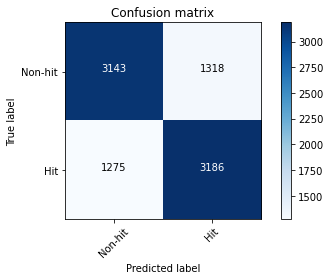

In [ ]:
cm = np.array(df_class.test_confusion_matrix.iloc[0])

plot_confusion_matrix(cm, ["Non-hit","Hit"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 0 to 27
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   category                847 non-null    object 
 1   new_features_params     770 non-null    object 
 2   features                847 non-null    object 
 3   year_range              847 non-null    object 
 4   algorithm               847 non-null    object 
 5   parameters              847 non-null    object 
 6   class_balancing         847 non-null    object 
 7   problem                 847 non-null    object 
 8   test_accuracy           616 non-null    float64
 9   test_log_loss           616 non-null    float64
 10  test_confusion_matrix   616 non-null    object 
 11  test_precision_0        616 non-null    float64
 12  test_precision_1        616 non-null    float64
 13  test_recall_0           616 non-null    float64
 14  test_recall_1           616 non-null    flo